In [ ]:
!gdown 101_VRJU4I2KGRIGOoyaKIGMunHL7w0R2

Downloading...
From: https://drive.google.com/uc?id=101_VRJU4I2KGRIGOoyaKIGMunHL7w0R2
To: /content/data-sampah.zip
100% 223M/223M [00:00<00:00, 241MB/s]


In [ ]:
import zipfile
local_zip = './data-sampah.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

!ls

data-sampah  data-sampah.zip  sample_data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation
from keras.layers import Dropout, Dense, Flatten, BatchNormalization


In [ ]:
train_dir = '/content/data-sampah/DATASET/TRAIN'
test_dir = '/content/data-sampah/DATASET/TEST'

In [ ]:
batch_size = 32
img_height = 64
img_width = 64

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 22564 files belonging to 2 classes.
Using 18052 files for training.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2513 files belonging to 2 classes.
Using 502 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['O', 'R']


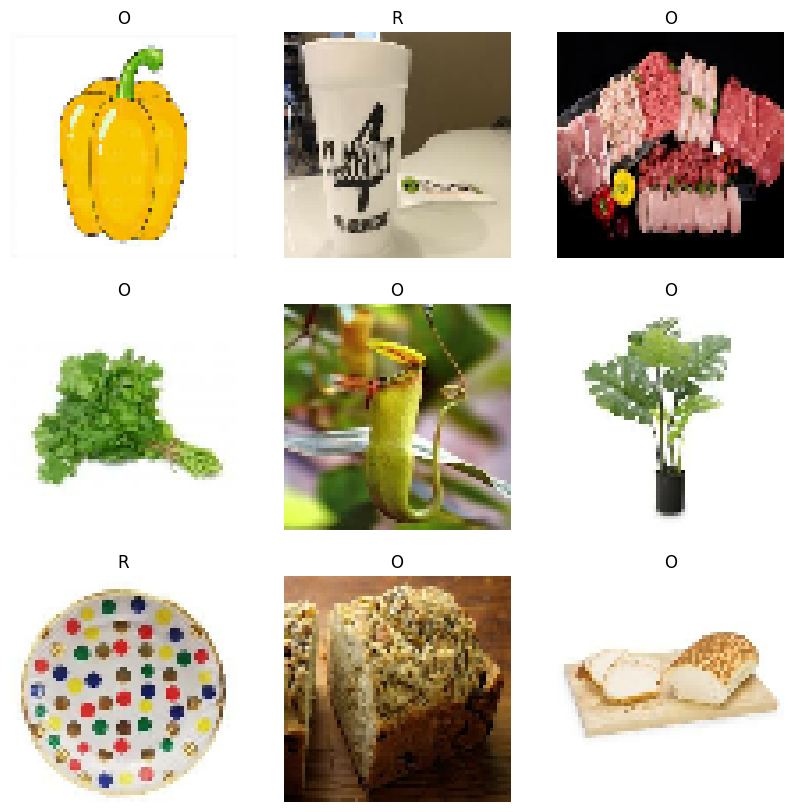

In [ ]:
plt.figure(figsize= (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 64, 64, 3)
(32,)


In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
X_train, y_train = next(iter(normalized_ds))
first_image = X_train[0]
print(np.min(first_image), np.max(first_image))

0.0074697463 1.0


In [ ]:
normalized_test = test_ds.map(lambda x, y: (normalization_layer(x), y))
X_test, y_test = next(iter(normalized_test))
first_img = X_test[0]
print(np.min(first_img), np.max(first_img))

0.0 1.0


In [ ]:
model = Sequential([                
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)), 
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation="relu"),
  tf.keras.layers.Dense(units=64, activation="relu"),
  tf.keras.layers.Dense(units=1, activation="sigmoid")
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 64)        

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs = 30,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.6913 - accuracy: 0.5312 - val_loss: 0.7150 - val_accuracy: 0.3438
Epoch 2/30
1/1 [==============================] - 0s 294ms/step - loss: 0.6578 - accuracy: 0.5938 - val_loss: 0.6315 - val_accuracy: 0.6875
Epoch 3/30
1/1 [==============================] - 0s 292ms/step - loss: 0.6274 - accuracy: 0.6562 - val_loss: 0.9482 - val_accuracy: 0.3438
Epoch 4/30
1/1 [==============================] - 0s 300ms/step - loss: 0.6701 - accuracy: 0.5625 - val_loss: 0.6397 - val_accuracy: 0.6875
Epoch 5/30
1/1 [==============================] - 0s 292ms/step - loss: 0.5559 - accuracy: 0.8438 - val_loss: 0.5710 - val_accuracy: 0.6875
Epoch 6/30
1/1 [==============================] - 0s 290ms/step - loss: 0.5690 - accuracy: 0.6875 - val_loss: 0.7250 - val_accuracy: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 318ms/step - loss: 0.4840 - accuracy: 0.8438 - val_loss: 0.8629 - val_accuracy: 0.3750
Epoch 8/30
1/1 [=======

In [ ]:
loss, accuracy = model.evaluate(X_train,y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test,y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.7812


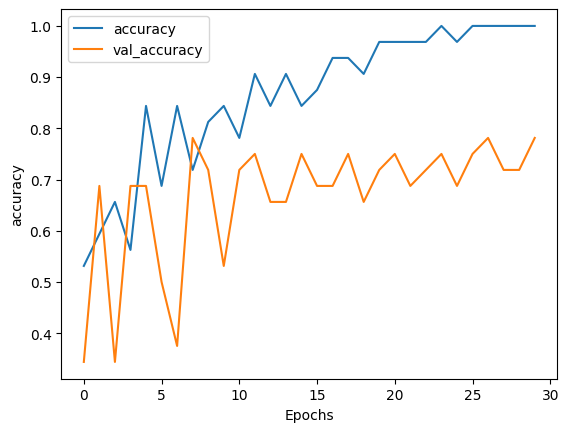

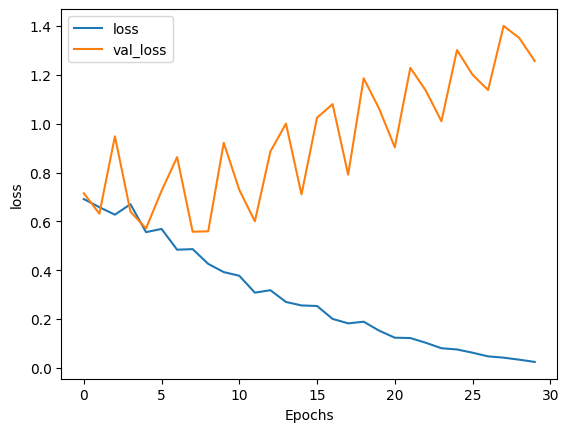

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# save the model
model.save("waste_CNN_model.h5")

**MODEL 2**

In [ ]:
model2 = Sequential([
   tf.keras.layers.Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(64, activation="relu"),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(32, activation="relu"),
   tf.keras.layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 64)        

In [ ]:
history_2 = model2.fit(
    X_train, y_train,
    epochs = 30,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.6987 - accuracy: 0.4062 - val_loss: 0.6732 - val_accuracy: 0.6562
Epoch 2/30
1/1 [==============================] - 1s 616ms/step - loss: 0.6854 - accuracy: 0.5938 - val_loss: 0.7205 - val_accuracy: 0.3438
Epoch 3/30
1/1 [==============================] - 1s 533ms/step - loss: 0.6961 - accuracy: 0.5312 - val_loss: 0.7096 - val_accuracy: 0.3438
Epoch 4/30
1/1 [==============================] - 1s 613ms/step - loss: 0.6912 - accuracy: 0.5625 - val_loss: 0.6929 - val_accuracy: 0.4062
Epoch 5/30
1/1 [==============================] - 0s 368ms/step - loss: 0.6408 - accuracy: 0.8438 - val_loss: 0.6752 - val_accuracy: 0.6562
Epoch 6/30
1/1 [==============================] - 0s 315ms/step - loss: 0.6404 - accuracy: 0.6875 - val_loss: 0.6552 - val_accuracy: 0.6562
Epoch 7/30
1/1 [==============================] - 0s 321ms/step - loss: 0.6449 - accuracy: 0.7188 - val_loss: 0.6358 - val_accuracy: 0.6875
Epoch 8/30
1/1 [=======

In [ ]:
history_2 = model2.fit(
    X_train, y_train,
    epochs = 30,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/30
1/1 [==============================] - 1s 905ms/step - loss: 0.2903 - accuracy: 0.8750 - val_loss: 0.7525 - val_accuracy: 0.8750
Epoch 2/30
1/1 [==============================] - 1s 1s/step - loss: 0.2044 - accuracy: 0.9062 - val_loss: 1.4579 - val_accuracy: 0.7500
Epoch 3/30
1/1 [==============================] - 1s 792ms/step - loss: 0.2219 - accuracy: 0.8750 - val_loss: 1.3897 - val_accuracy: 0.7500
Epoch 4/30
1/1 [==============================] - 0s 351ms/step - loss: 0.1229 - accuracy: 0.9688 - val_loss: 0.9561 - val_accuracy: 0.8125
Epoch 5/30
1/1 [==============================] - 0s 298ms/step - loss: 0.0984 - accuracy: 0.9688 - val_loss: 0.7790 - val_accuracy: 0.8750
Epoch 6/30
1/1 [==============================] - 0s 331ms/step - loss: 0.1255 - accuracy: 0.9375 - val_loss: 0.8086 - val_accuracy: 0.8750
Epoch 7/30
1/1 [==============================] - 0s 311ms/step - loss: 0.1107 - accuracy: 0.9375 - val_loss: 1.0393 - val_accuracy: 0.7812
Epoch 8/30
1/1 [=======

In [ ]:
loss, accuracy = model2.evaluate(X_train,y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test,y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.7812


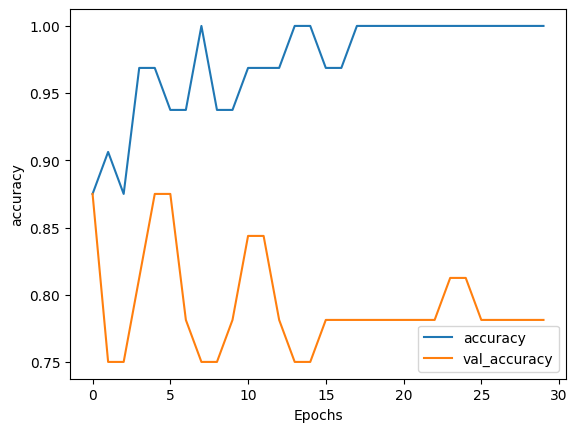

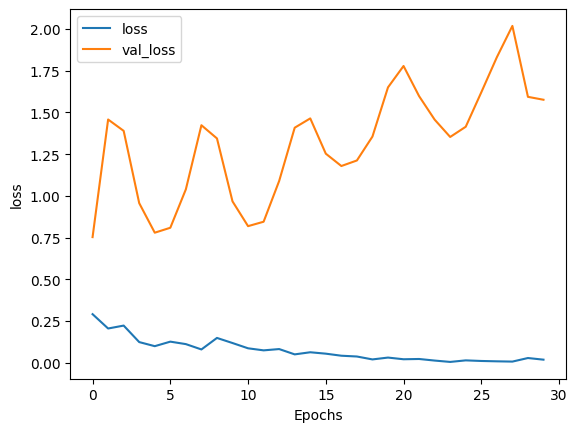

In [ ]:
plot_graphs(history_2, "accuracy")
plot_graphs(history_2, "loss")

In [ ]:
# save the model
model2.save("waste_CNN_model2.h5")

In [ ]:
# add the image path
test_image = image.load_img('/content/gambar3.jpg', target_size = (64, 64))

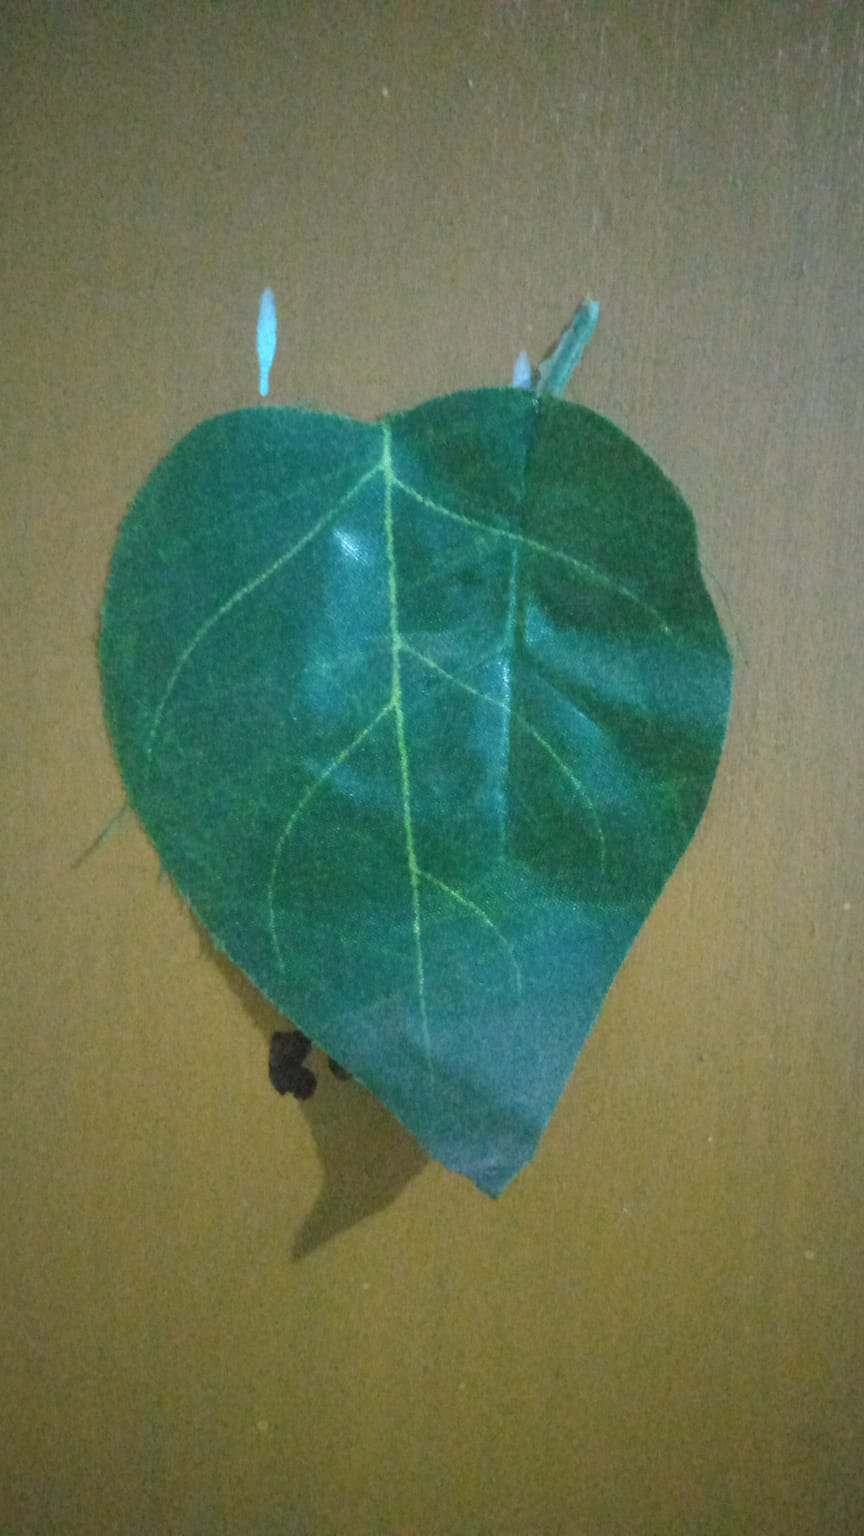

In [ ]:
Image.open('/content/gambar3.jpg')

In [ ]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

# prediction
result = model.predict(test_image)

1/1 [==============================] - 0s 31ms/step


In [ ]:
# dataset class index
train_ds.class_names

['O', 'R']

In [ ]:
print(result)

[[0.]]


In [ ]:
if result[0][0] == 1:
    prediction = 'Recyclable Waste'
else:
    prediction = 'Organic Waste'

In [ ]:
print(prediction)

Organic Waste
